# 선형회귀

## 단순선형회귀 (Simple Linear Regression)
독립변수 1개(X)로 종속변수 1개(Y)를 직선으로 설명/예측하는 방법이다.

개념설명
- 회귀식: ```Y = β0 + β1X```
- β0는 절편(기본값), β1은 기울기(X가 1 늘 때 Y가 얼마나 변하는지).
- 데이터가 대체로 직선 경향일 때 잘 맞고, 아니면 잘 안 맞을 수 있다.

예시설명
- 광고비(X)로 매출(Y)을 예측한다.
- 공부시간(X)으로 시험점수(Y)을 예측한다

회귀 계수: [[2.9902591]]
절편: [4.20634019]
평균 제곱 오차(MSE): 0.9177532469714291
결정 계수(R2): 0.6521157503858556


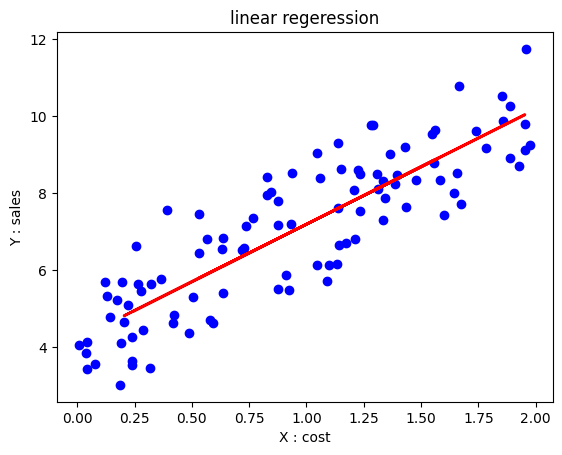

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

# 시각화
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('linear regeression')
plt.xlabel('X : cost')
plt.ylabel('Y : sales')
plt.show()

## 다중선형회귀 (Multiple Linear Regression)
독립변수 여러 개(X1, X2, …)로 Y를 함께 설명/예측하는 방법

개념설명
- 회귀식: ```Y = β0 + β1X1 + β2X2 + ... + βnXn```
- 여러 요인이 동시에 Y에 영향을 줄 때 쓴다.
- 각 β는 “다른 변수들을 같이 고려한 상태에서” 해당 변수의 영향으로 해석한다.

예시설명
- TV/Radio/Newspaper 광고비로 매출을 예측한다.
- 집값(Y)을 면적/층/역세권 여부 같은 여러 변수로 예측한다.


### 다중공선성 (Multicollinearity)
독립변수들끼리 서로 너무 비슷하게 움직여서(상관이 높아서) 영향 분리가 어려운 문제다.

개념설명
- X들끼리 강하게 연관되면, “각 변수가 Y에 얼마나 기여했는지”를 깔끔히 나누기 어렵다.
- 그래서 중요한 변수가 통계적으로 덜 유의하게 보이는 등의 문제가 생길 수 있다.

예시설명
- TV 광고비가 늘면 Radio 광고비도 거의 같이 늘어나는 데이터.
- 비슷한 의미의 지표(예: ‘총 광고비’와 ‘TV+Radio 합’)를 동시에 넣는 경우.

In [3]:
# 예시 데이터 생성
data = {'TV': np.random.rand(100) * 100,
        'Radio': np.random.rand(100) * 50,
        'Newspaper': np.random.rand(100) * 30,
        'Sales': np.random.rand(100) * 100}
df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

회귀 계수: [-0.02208636 -0.04524956  0.36955755]
절편: 47.47458066489462
평균 제곱 오차(MSE): 953.8458662397383
결정 계수(R2): -0.14044120780448188


## 범주형 변수(Categorical Variable)
숫자 크기 의미가 아니라 ‘종류(범주)’로 구분되는 변수다.

개념설명
- 값이 주로 문자(라벨)로 표현된다.
- 회귀분석 같은 모델에 넣으려면 보통 더미 변수(인코딩) 형태로 바꿔서 사용한다.

예시
- 성별(남/여)
- 지역(도시/시골)

### 순서가 있는 범주형 변수(Ordinal)
범주 사이에 순서가 있는 범주형 변수다.

예시설명
- 옷 사이즈: S < M < L < XL
- 수능 등급: 1등급, 2등급, 3등급 …

### 순서가 없는 범주형 변수(Nominal)
범주 사이에 순서가 없는 범주형 변수다.

예시설명
- 지역(부산/대전/대구/광주) → [1,0,0,0]처럼 한 자리만 1
- 혈액형(A/B/O/AB)도 원-핫 인코딩 대상

### 더미 변수 / 원-핫 인코딩(One-hot)
범주 하나를 0/1 컬럼 여러 개로 펼쳐서 표현하는 방법이다.

개념설명
- 범주가 k개면 보통 k개의 컬럼이 생기고, 해당 범주에만 1, 나머지는 0이 된다.
- pandas에서는 get_dummies로 쉽게 생성


예시설명
- 부산 = [1,0,0,0], 대전 = [0,1,0,0] 같은 형태
- 성별(남/여)도 [1,0]처럼 만들 수 있다

In [4]:
# 예시 데이터 생성
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
        'Experience': [5, 7, 10, 3, 8],
        'Salary': [50, 60, 65, 40, 55]}
df = pd.DataFrame(data)

# 범주형 변수 더미 변수로 변환
df = pd.get_dummies(df, drop_first=True)

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['Experience', 'Gender_Male']]
y = df['Salary']

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

회귀 계수: [ 2.57281553 -6.01941748]
절편: 40.63106796116506
평균 제곱 오차(MSE): 3.1067961165048588
결정 계수(R2): 0.9580162686958803


## 다항회귀(Polynomial Regression)
X–Y 관계가 직선이 아니라 곡선일 때, X의 다항식(제곱/세제곱 등)으로 예측하는 회귀

개념설명
- 선형회귀처럼 “회귀”인데, 입력 X를 X, X^2, X^3 ...처럼 늘려서 곡선을 표현한다.
- 데이터가 곡선 경향이면 직선보다 더 잘 맞을 수 있다.
- 차수를 너무 높이면 데이터에 과하게 맞춰 과적합 위험이 있다.

예시설명
- 면적(X)과 집값(Y)이 직선이 아니라 곡선처럼 변할 때(주택 가격 예측).
- 어떤 변화가 “처음엔 급격, 나중엔 완만” 같은 곡선 패턴일 때.

## 스플라인 회귀(Spline Regression)
X 구간을 나눠서 구간마다 다른 회귀식을 쓰되, 전체는 매끄러운 곡선이 되게 만드는 방법

개념설명
- 데이터가 구간마다 패턴이 달라 보이면(국부적으로 다름) 한 방의 다항식보다 유리할 수 있다.
- 구간 경계(매듭점, knots)를 어디에 두는지가 중요하다.

예시설명
- 특정 구간에서는 증가하다가 다른 구간에서는 완만해지는 등 “구간별”로 모양이 달라지는 데이터
- 나이(X)와 어떤 지표(Y)가 구간별로 다른 변화 패턴을 보일 때

평균 제곱 오차(MSE): 9.447441952450275
결정 계수(R2): 0.9898873384220381


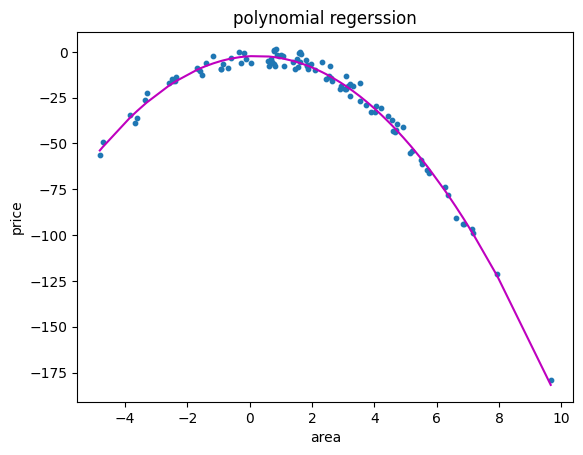

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# 예시 데이터 생성
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]

# 다항 회귀 (2차)
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# 모델 평가
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

# 시각화
plt.scatter(X, y, s=10)
# 정렬된 X 값에 따른 y 값 예측
sorted_zip = sorted(zip(X, y_poly_pred))
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.title('polynomial regerssion')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

# 문제풀이

1. 단순선형회귀 회귀직선 방정식

Y=β0​+β1​X

2. 다중선형회귀 올바른 회귀 방정식

Y=β0​+β1​X1​+β2​X2​+⋯+βn​Xn

3. 다항회귀(독립변수 1개, 2차 비선형) 방정식 형태

Y=β0​+β1​X+β2​X2

4. **스플라인 회귀는 주로 어떤 문제를 해결하기 위해 사용되나요?**
    1) 변수 간의 상관관계를 분석하기 위해
    2) 데이터의 복잡한 비선형적 관계를 모델링하기 위해
    3) 두 그룹 간의 평균 차이를 비교하기 위해
    4) 범주형 변수를 처리하기 위해

2번: 스플라인 회귀는 구간별로 다른 식을 적용해서 전체적으로 매끄러운 곡선을 만들며, 복잡한 비선형 관계를 유연하게 모델링하려고 쓴다.